In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import numpy as np
import cv2
from waymo_open_dataset import dataset_pb2 as open_dataset
from waymo_open_dataset.wdl_limited.camera.ops import py_camera_model_ops
from waymo_open_dataset.protos import end_to_end_driving_data_pb2 as wod_e2ed_pb2

2025-04-27 14:02:27.457764: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-27 14:02:27.459322: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-27 14:02:27.490000: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-27 14:02:27.490483: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-27 14:02:28.899470: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
# Set environment variables for authentication
os.environ['CURL_CA_BUNDLE'] = '/home/aaylen/Documents/Waymo-Challenge/cacert.pem'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/home/aaylen/Documents/Waymo-Challenge/token1.json'

# Define dataset path
DATASET_FOLDER = 'gs://waymo_open_dataset_end_to_end_camera_v_1_0_0'
TRAIN_FILES = os.path.join(DATASET_FOLDER, '*.tfrecord-*')

# Initialize dataset
filenames = tf.io.matching_files(TRAIN_FILES)
dataset = tf.data.TFRecordDataset(filenames, compression_type='')
dataset_iter = dataset.as_numpy_iterator()

# Retrieve one example (targeting the specified frame)
target_frame_name = 'ad58476e67ef355a35f3e5e3530587f2-077'
data = None
for bytes_example in dataset_iter:
    frame_data = wod_e2ed_pb2.E2EDFrame()
    frame_data.ParseFromString(bytes_example)
    print(frame_data.frame.context.name)
    if frame_data.frame.context.name == target_frame_name:
        data = frame_data
        break

2025-04-27 14:02:58.228501: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-04-27 14:02:58.228897: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2025-04-27 14:02:59.617383: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Pla

d6cdf6eb1b7d4a8be6dac71f34e6cdb7-164
b197472f28df9f18c22654a5b514082a-072
2fc83038cb02199f1e530808f50e3862-070
57a6271444a065e7669292e6361fc2a1-136
670439f14c52d50310c70771896d002d-125
ad58476e67ef355a35f3e5e3530587f2-077


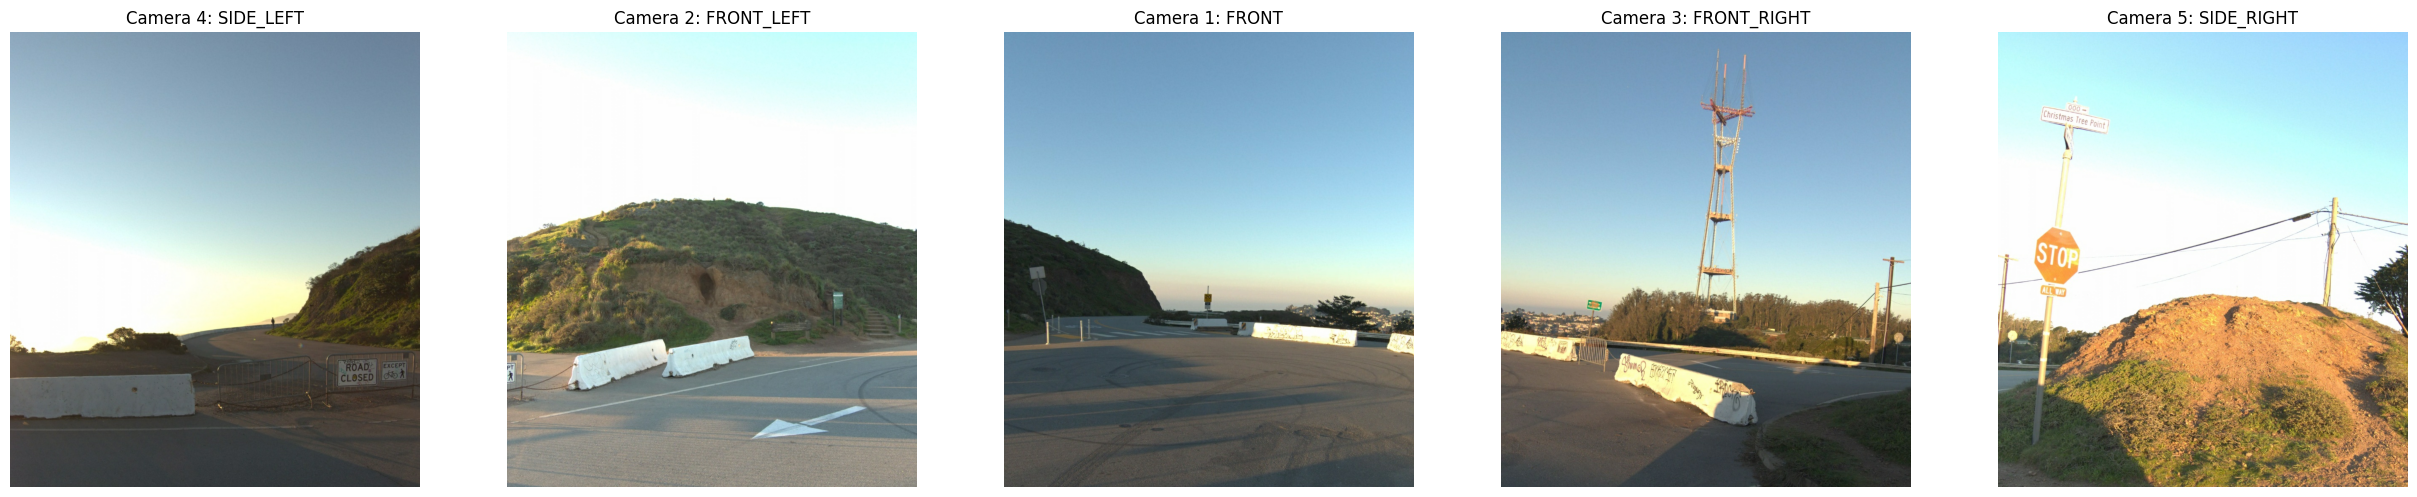

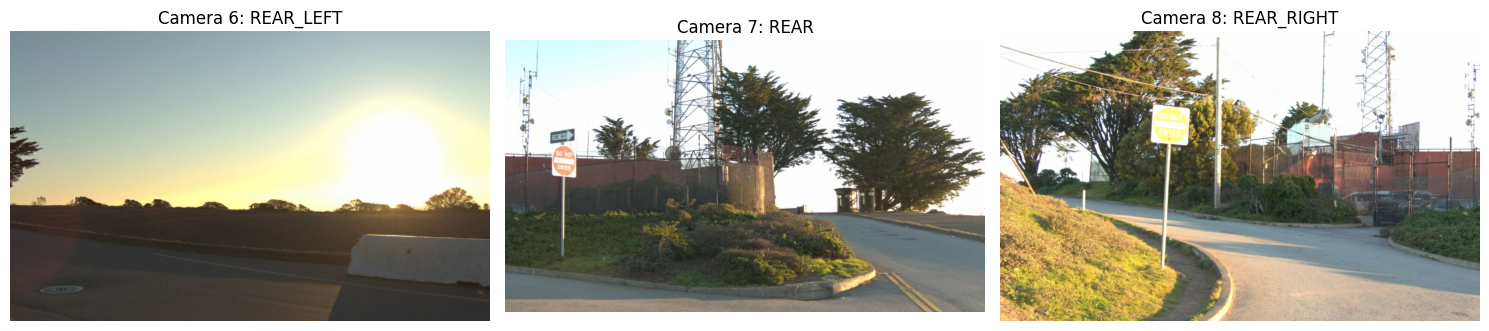

In [32]:
# Define camera groups
front_side_cameras = [
    open_dataset.CameraName.SIDE_LEFT,
    open_dataset.CameraName.FRONT_LEFT,
    open_dataset.CameraName.FRONT,
    open_dataset.CameraName.FRONT_RIGHT,
    open_dataset.CameraName.SIDE_RIGHT
]
back_cameras = [
    open_dataset.CameraName.REAR_LEFT,
    open_dataset.CameraName.REAR,
    open_dataset.CameraName.REAR_RIGHT
]

# Plot 1: Front and Side Cameras (1x5 grid)
fig1, axes1 = plt.subplots(1, 5, figsize=(25, 5))
for i, cam_id in enumerate(front_side_cameras):
    for image in data.frame.images:
        if image.name == cam_id:
            img_array = tf.io.decode_jpeg(image.image).numpy()
            cam_name = open_dataset.CameraName.Name.Name(cam_id)
            axes1[i].imshow(img_array)
            axes1[i].set_title(f"Camera {cam_id}: {cam_name}")
            axes1[i].axis('off')
            break
plt.tight_layout()
plt.show()

# Plot 2: Back Cameras (1x3 grid)
fig2, axes2 = plt.subplots(1, 3, figsize=(15, 5))
for i, cam_id in enumerate(back_cameras):
    for image in data.frame.images:
        if image.name == cam_id:
            img_array = tf.io.decode_jpeg(image.image).numpy()
            cam_name = open_dataset.CameraName.Name.Name(cam_id)
            axes2[i].imshow(img_array)
            axes2[i].set_title(f"Camera {cam_id}: {cam_name}")
            axes2[i].axis('off')
            break
plt.tight_layout()
plt.show()

## Rectify all 8 cameras 